In [1]:
# import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import sleep

from random import randint

# set the directory for the data
data_dir = 'Resources'

# set the directory for the output
output_dir = 'Output'

import pathlib
cwd = pathlib.Path().resolve()

### Reading in data

In [2]:
aq_df = pd.read_csv(os.path.join(os.getcwd(), output_dir,'air_quality.csv'))
walkability_df = pd.read_csv(os.path.join(os.getcwd(), data_dir, 'EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv'))
vehicle_df = pd.read_csv(os.path.join(os.getcwd(), data_dir, 'Vehicle__Snowmobile__and_Boat_Registrations.csv'))

C:\Users\Tim\AppData\Local\Temp\ipykernel_63764\3137149016.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv(os.path.join(os.getcwd(), data_dir, 'Vehicle__Snowmobile__and_Boat_Registrations.csv'))


### Format and clean vehicle registaion data

In [3]:
# format and clean vehicle registaion data

# filter for NY state
ny_vehcile_regestrations_df = vehicle_df[vehicle_df['State'] == 'NY']

# convert dates to datetime
ny_vehcile_regestrations_df['Reg Valid Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Valid Date'])
ny_vehcile_regestrations_df['Reg Expiration Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Expiration Date'])

# filter for vehicles
ny_vehcile_regestrations_df = ny_vehcile_regestrations_df[ny_vehcile_regestrations_df['Record Type'] == 'VEH']

display(ny_vehcile_regestrations_df.value_counts('City'))


C:\Users\Tim\AppData\Local\Temp\ipykernel_63764\3284376526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_vehcile_regestrations_df['Reg Valid Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Valid Date'])
C:\Users\Tim\AppData\Local\Temp\ipykernel_63764\3284376526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_vehcile_regestrations_df['Reg Expiration Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Expiration Date'])


City
BROOKLYN          536605
ROCHESTER         310424
BRONX             283219
STATEN ISLAND     282800
NEW YORK          226600
                   ...  
KEW GARDN HLL          1
KEW GARDNS HL          1
KEW GARDNS HLL         1
KEW GARENS             1
ZONE PARK              1
Name: count, Length: 23894, dtype: int64

### Data from the five boros

In [4]:
# get data for all five boroughs
manhattan = ['MANHATTAN', 'NEW YORK', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']
brooklyn = ['BROOKLYN', 'BRKLYN']
queens = [
'NEIGHBORHOODS','ALLEY POND PARK','ARVERNE','ASTORIA','ASTORIA HEIGHTS',
'AUBURNDALE','BAY TERRACE','BAYSIDE','BAYSIDE HILLS','BAYSWATER','BEECHHURST',
'BELLAIRE','BELLE HARBOR','BELLEROSE','BELLEROSE MANOR','BREEZY POINT',
'BRIARWOOD','BROAD CHANNEL','BROADWAY-FLUSHING','BROOKVILLE','BROOKVILLE PARK',
'CAMBRIA HEIGHTS','COLLEGE POINT','CORONA','CUNNINGHAM PARK','DITMARS-STEINWAY',
'DOUGLAS MANOR','DOUGLASTON','DOWNTOWN FLUSHING','EAST ELMHURST','EDGEMERE',
'ELMHURST','FAR ROCKAWAY','FLORAL PARK','FLUSHING HEIGHTS',
'FLUSHING MEADOWS CORONA PARK','FOREST HILLS','FOREST HILLS GARDENS',
'FOREST PARK','FORT TILDEN-JACOB RIIS PARKS','FRESH MEADOWS','GLEN OAKS',
'GLENDALE','HAMILTON BEACH''HILLCREST','THE HOLE','HOLLIS','HOLLIS HILLS',
'HOLLISWOOD','HOWARD BEACH','HUNTER \'S POINT','JACKSON HEIGHTS','JAMAICA',
'JAMAICA CENTER''JAMAICA ESTATES','JAMAICA HILLS','KEW GARDENS',
'KEW GARDENS HILLS','KISSENA','KISSENA PARK','LAURELTON','LINDEN HILL',
'LINDENWOOD','LITTLE NECK','LOCUST MANOR','LONG ISLAND CITY','MALBA','MASPETH',
'MEADOWMERE','MIDDLE VILLAGE','MURRAY HILL','NEPONSIT','NEW HYDE PARK',
'NORTH CORONA','OAKLAND GARDENS','OLD HOWARD BEACH','OZONE PARK','POMONOK',
'QUEENS VILLAGE','QUEENSBORO HILL','REGO PARK','RICHMOND HILL',
'RICHMOND HILL EAST','RIDGEWOOD','ROCHDALE','ROCKAWAY BEACH','ROCKAWAY PARK',
'ROSEDALE','ROXBURY','SOUTH JAMAICA','SOUTH OZONE PARK','SOUTH RICHMOND HILL',
'SPRINGFIELD GARDENS','ST. ALBANS','SUNNYSIDE','UTOPIA','WHITESTONE',
'WILLETS POINT','WOODHAVEN','WOODSIDE'
]
bronx = ['BRONX']
staten_island = ['STATEN ISLAND']
borough_data = manhattan + brooklyn + queens + bronx + staten_island



### Car data function

In [5]:
def getCarData(city_names):
    cars = pd.DataFrame()
    for city in city_names:
        cars = pd.concat([cars, ny_vehcile_regestrations_df.loc[ny_vehcile_regestrations_df['City'] == city]])
    cars['VIN'] = cars['VIN'].fillna(value='Unknown')


    # groups by VIN and gets the min and max dates for registration
    cars = cars.groupby('VIN').agg({'Reg Valid Date': 'min', 'Reg Expiration Date': 'max', 'Fuel Type': 'first'})

    # # filter for cars that were registered between 2018 and 2021
    cars = cars.reset_index()

    # # filter for cars that were registered between 2022 and 2024
    cars = cars[(cars['Reg Valid Date'] > '2022-04') & (cars['Reg Valid Date'] < '2024-04')]

    return cars

### Car Data by boro

In [6]:
bronx_cars = getCarData(bronx)
brooklyn_cars = getCarData(brooklyn)
queens_cars = getCarData(queens)
manhattan_cars = getCarData(manhattan)
staten_island_cars = getCarData(staten_island)

### Fuel type by boro

In [7]:
pivot_bronx_cars = pd.pivot_table(data = bronx_cars,values=['VIN'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])
pivot_bronx_cars = pivot_bronx_cars.droplevel(1,axis='index')
pivot_bronx_cars = pivot_bronx_cars.droplevel(0,axis='columns')
pivot_bronx_cars = pivot_bronx_cars.groupby(pivot_bronx_cars.index)[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE', 'OTHER','PROPANE']].sum()

pivot_brooklyn_cars = pd.pivot_table(data = brooklyn_cars,values=['VIN'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])
pivot_brooklyn_cars = pivot_brooklyn_cars.droplevel(1,axis='index')
pivot_brooklyn_cars = pivot_brooklyn_cars.droplevel(0,axis='columns')
pivot_brooklyn_cars = pivot_brooklyn_cars.groupby(pivot_brooklyn_cars.index)[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE', 'OTHER','PROPANE']].sum()

pivot_queens_cars = pd.pivot_table(data = bronx_cars,values=['VIN'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])
pivot_queens_cars = pivot_queens_cars.droplevel(1,axis='index')
pivot_queens_cars = pivot_queens_cars.droplevel(0,axis='columns')
pivot_queens_cars = pivot_queens_cars.groupby(pivot_queens_cars.index)[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE', 'OTHER','PROPANE']].sum()

pivot_manhattan_cars = pd.pivot_table(data = manhattan_cars,values=['VIN'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])
pivot_manhattan_cars = pivot_manhattan_cars.droplevel(1,axis='index')
pivot_manhattan_cars = pivot_manhattan_cars.droplevel(0,axis='columns')
pivot_manhattan_cars = pivot_manhattan_cars.groupby(pivot_manhattan_cars.index)[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE', 'OTHER','PROPANE']].sum()

pivot_staten_island_cars = pd.pivot_table(data = staten_island_cars,values=['VIN'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])
pivot_staten_island_cars = pivot_staten_island_cars.droplevel(1,axis='index')
pivot_staten_island_cars = pivot_staten_island_cars.droplevel(0,axis='columns')
pivot_staten_island_cars = pivot_staten_island_cars.groupby(pivot_staten_island_cars.index)[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE', 'OTHER']].sum()


#### Bronx

In [8]:
display(pivot_bronx_cars.head())

Fuel Type,COMP N/G,DIESEL,ELECTRIC,FLEX,GAS,NONE,OTHER,PROPANE
Reg Valid Date,,,,,,,,
2022-04-02,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
2022-04-03,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
2022-04-04,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
2022-04-05,0.0,0.0,0.0,0.0,81.0,0.0,0.0,0.0
2022-04-06,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0


#### Brooklyn

In [9]:
display(pivot_brooklyn_cars.head())

Fuel Type,COMP N/G,DIESEL,ELECTRIC,FLEX,GAS,NONE,OTHER,PROPANE
Reg Valid Date,,,,,,,,
2022-04-02,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0
2022-04-03,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0
2022-04-04,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2022-04-05,0.0,3.0,1.0,0.0,264.0,0.0,0.0,0.0
2022-04-06,0.0,1.0,1.0,0.0,184.0,0.0,0.0,0.0


#### Queens

In [10]:
display(pivot_queens_cars.head())

Fuel Type,COMP N/G,DIESEL,ELECTRIC,FLEX,GAS,NONE,OTHER,PROPANE
Reg Valid Date,,,,,,,,
2022-04-02,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
2022-04-03,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
2022-04-04,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
2022-04-05,0.0,0.0,0.0,0.0,81.0,0.0,0.0,0.0
2022-04-06,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0


#### Manhattan

In [11]:
display(pivot_manhattan_cars.head())

Fuel Type,COMP N/G,DIESEL,ELECTRIC,FLEX,GAS,NONE,OTHER,PROPANE
Reg Valid Date,,,,,,,,
2022-04-02,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0
2022-04-03,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0
2022-04-04,0.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0
2022-04-05,0.0,8.0,6.0,0.0,685.0,0.0,0.0,0.0
2022-04-06,0.0,1.0,1.0,0.0,403.0,0.0,0.0,0.0


#### Staten Island

In [12]:
display(pivot_staten_island_cars.head())

Fuel Type,COMP N/G,DIESEL,ELECTRIC,FLEX,GAS,NONE,OTHER
Reg Valid Date,,,,,,,
2022-04-02,0.0,0.0,0.0,0.0,6.0,0.0,0.0
2022-04-03,0.0,0.0,0.0,0.0,11.0,0.0,0.0
2022-04-04,0.0,0.0,0.0,0.0,17.0,0.0,0.0
2022-04-05,0.0,2.0,0.0,0.0,125.0,0.0,0.0
2022-04-06,0.0,0.0,0.0,0.0,80.0,0.0,0.0


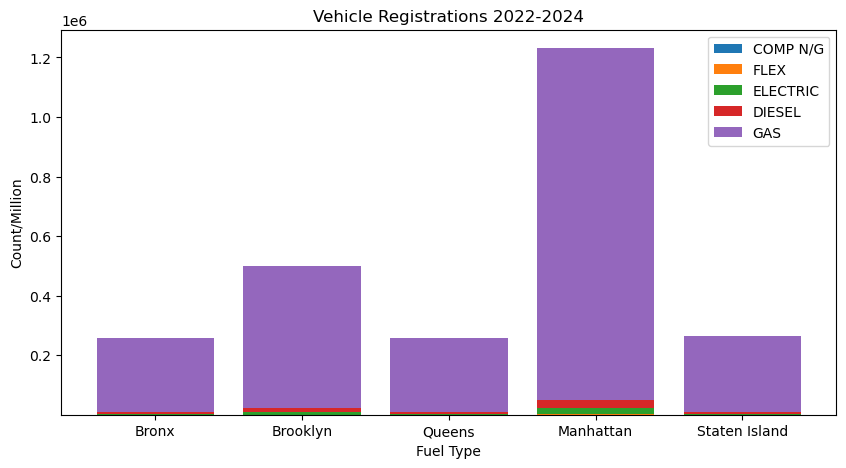

In [13]:
cars = pd.DataFrame({'Bronx':pivot_bronx_cars.sum(), 'Brooklyn':pivot_brooklyn_cars.sum(), 
'Queens':pivot_queens_cars.sum(), 'Manhattan':pivot_manhattan_cars.sum(), 
'Staten Island':pivot_staten_island_cars.sum()
                    })

y = [cars.loc['COMP N/G'],cars.loc['FLEX'],cars.loc['ELECTRIC'],cars.loc['DIESEL'],cars.loc['GAS']]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(cars.columns,y[0],label='COMP N/G')

ax.bar(cars.columns,cars.loc['FLEX'],
       bottom =y[0], 
       label='FLEX')

ax.bar(cars.columns,cars.loc['ELECTRIC'],
       bottom =y[0]+y[1],
       label='ELECTRIC')

ax.bar(cars.columns,cars.loc['DIESEL'],
       bottom =y[0]+y[1]+y[2],
       label='DIESEL')

ax.bar(cars.columns,cars.loc['GAS'],
       bottom =y[0]+y[1]+y[2]+y[3],
       label='GAS')

plt.legend()
plt.xlabel('Fuel Type')
plt.ylabel('Count/Million')
plt.title('Vehicle Registrations 2022-2024')
plt.show()

### Fuel type by boro visualization

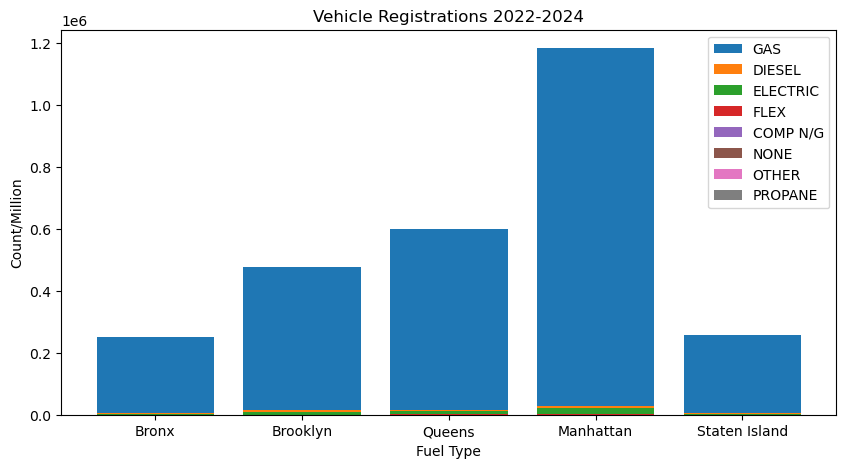

In [8]:
# display all cities by FuelType as a signle bar chart
fuel_types = bronx_cars['Fuel Type'].value_counts().index
fuel_types = fuel_types.append(brooklyn_cars['Fuel Type'].value_counts().index)
fuel_types = fuel_types.append(queens_cars['Fuel Type'].value_counts().index)
fuel_types = fuel_types.append(manhattan_cars['Fuel Type'].value_counts().index)
fuel_types = fuel_types.append(staten_island_cars['Fuel Type'].value_counts().index)

fuel_types = fuel_types.unique()

fig, ax = plt.subplots(figsize=(10, 5))
for fuel in fuel_types:
    cars = pd.DataFrame({'City': ['Bronx', 'Brooklyn', 'Queens', 'Manhattan', 'Staten Island'], 'Count': [bronx_cars[bronx_cars['Fuel Type'] == fuel].shape[0], brooklyn_cars[brooklyn_cars['Fuel Type'] == fuel].shape[0], queens_cars[queens_cars['Fuel Type'] == fuel].shape[0], manhattan_cars[manhattan_cars['Fuel Type'] == fuel].shape[0], staten_island_cars[staten_island_cars['Fuel Type'] == fuel].shape[0]]})
    ax.bar(cars['City'], cars['Count'], label=fuel)

plt.legend()
plt.xlabel('Fuel Type')
plt.ylabel('Count/Million')
plt.title('Vehicle Registrations 2022-2024')
plt.show()


In [13]:
bronx_cars = bronx_cars[bronx_cars['Fuel Type'] != 'PROPANE']
brooklyn_cars = brooklyn_cars[brooklyn_cars['Fuel Type'] != 'PROPANE']
queens_cars = queens_cars[queens_cars['Fuel Type'] != 'PROPANE']
manhattan_cars = manhattan_cars[manhattan_cars['Fuel Type'] != 'PROPANE']
staten_island_cars = staten_island_cars[staten_island_cars['Fuel Type'] != 'PROPANE']

#  get percetage of each fuel type by borough
bronx_count = bronx_cars['Fuel Type'].value_counts()
brooklyn_count = brooklyn_cars['Fuel Type'].value_counts()
queens_count = queens_cars['Fuel Type'].value_counts()
manhattan_count = manhattan_cars['Fuel Type'].value_counts()
staten_island_count = staten_island_cars['Fuel Type'].value_counts()

bronx_avg = bronx_count / bronx_cars.shape[0]
brooklyn_avg = brooklyn_count / brooklyn_cars.shape[0]
queens_avg = queens_count / queens_cars.shape[0]
manhattan_avg = manhattan_count / manhattan_cars.shape[0]
staten_island_avg = staten_island_count / staten_island_cars.shape[0]

nyc_avg = (bronx_count + brooklyn_count + queens_count + manhattan_count + staten_island_count) / (bronx_cars.shape[0] + brooklyn_cars.shape[0] + queens_cars.shape[0] + manhattan_cars.shape[0] + staten_island_cars.shape[0])

nyc_avg


Fuel Type
COMP N/G    0.000218
DIESEL      0.023359
ELECTRIC    0.016198
FLEX        0.001026
GAS         0.958417
NONE        0.000406
OTHER       0.000377
Name: count, dtype: float64

In [14]:
# join percentage data on fuel type
bronx_avg = bronx_avg.to_frame()
bronx_avg.columns = ['Bronx']
brooklyn_avg = brooklyn_avg.to_frame()
brooklyn_avg.columns = ['Brooklyn']
queens_avg = queens_avg.to_frame()
queens_avg.columns = ['Queens']
manhattan_avg = manhattan_avg.to_frame()
manhattan_avg.columns = ['Manhattan']
staten_island_avg = staten_island_avg.to_frame()
staten_island_avg.columns = ['Staten Island']
nyc_avg = nyc_avg.to_frame()
nyc_avg.columns = ['NYC']

fuel_avg = bronx_avg.join(brooklyn_avg).join(queens_avg).join(manhattan_avg).join(staten_island_avg).join(nyc_avg)

fuel_avg = fuel_avg.fillna(value=0)

fuel_avg

,Bronx,Brooklyn,Queens,Manhattan,Staten Island,NYC
Fuel Type,,,,,,
GAS,0.965349,0.952415,0.953927,0.959654,0.967817,0.958417
DIESEL,0.020884,0.028136,0.025474,0.022082,0.017714,0.023359
ELECTRIC,0.011467,0.017269,0.018273,0.016328,0.013276,0.016198
FLEX,0.001015,0.000955,0.001448,0.000919,0.000673,0.001026
COMP N/G,0.000771,0.000074,0.000228,0.000199,0.000015,0.000218
NONE,0.000376,0.000456,0.000459,0.000413,0.000184,0.000406
OTHER,0.000139,0.000695,0.000191,0.000405,0.000320,0.000377


#### Setting index

In [16]:
bronx_cars = bronx_cars.set_index('Reg Valid Date')
brooklyn_cars = brooklyn_cars.set_index('Reg Valid Date')
queens_cars = queens_cars.set_index('Reg Valid Date')
manhattan_cars = manhattan_cars.set_index('Reg Valid Date')
staten_island_cars = staten_island_cars.set_index('Reg Valid Date')

#### Sampling

In [17]:
sample_bronx_cars = bronx_cars.resample('W').count()
sample_brooklyn_cars = brooklyn_cars.resample('W').count()
sample_queens_cars = queens_cars.resample('W').count()
sample_manhattan_cars = manhattan_cars.resample('W').count()
sample_staten_island_cars = staten_island_cars.resample('W').count()

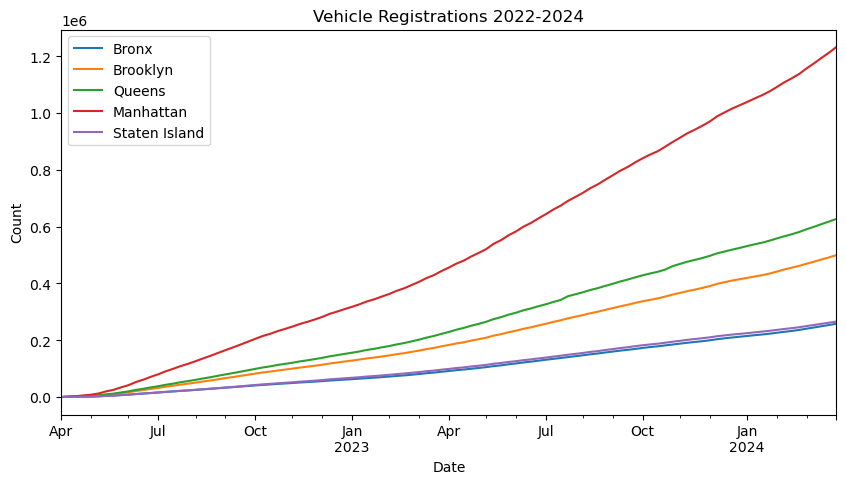

<Figure size 2000x1500 with 0 Axes>

In [19]:
# show vehicle registration by borough over time
fig, ax = plt.subplots(figsize=(10, 5))


sample_bronx_cars['Fuel Type'].cumsum().plot(ax=ax, label='Bronx')
sample_brooklyn_cars['Fuel Type'].cumsum().plot(ax=ax, label='Brooklyn')
sample_queens_cars['Fuel Type'].cumsum().plot(ax=ax, label='Queens')
sample_manhattan_cars['Fuel Type'].cumsum().plot(ax=ax, label='Manhattan')
sample_staten_island_cars['Fuel Type'].cumsum().plot(ax=ax, label='Staten Island')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Vehicle Registrations 2022-2024')
plt.figure(figsize=(20, 15))
plt.show()


In [20]:
nyc_aq = aq_df[aq_df['ReportingArea'] == 'New York City Region']

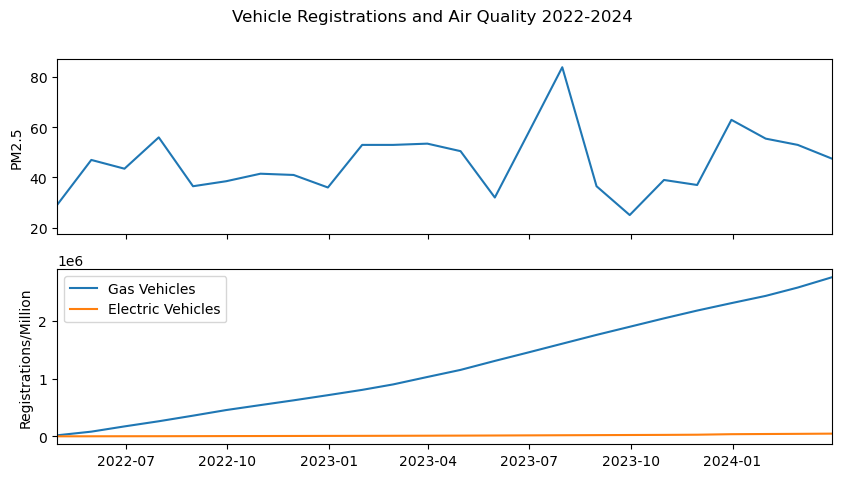

In [21]:
nyc_cars = pd.concat([bronx_cars, brooklyn_cars, queens_cars, manhattan_cars, staten_island_cars])
nyc_gas = nyc_cars[nyc_cars['Fuel Type'] == 'GAS']
nyc_gas = nyc_gas.reset_index()
nyc_gas = nyc_gas.set_index('Reg Valid Date')
nyc_gas = nyc_gas.resample('M').count()
nyc_electric = nyc_cars[nyc_cars['Fuel Type'] == 'ELECTRIC']
nyc_electric = nyc_electric.reset_index()
nyc_electric = nyc_electric.set_index('Reg Valid Date')
nyc_electric = nyc_electric.resample('M').count()

nyc_aq = aq_df[aq_df['ReportingArea'] == 'New York City Region']
nyc_aq = nyc_aq.reset_index()
nyc_aq['DateObserved'] = pd.to_datetime(nyc_aq['DateObserved'])
nyc_aq = nyc_aq.set_index('DateObserved')
nyc_aq = nyc_aq.resample('M')[['AQI']].mean()

# plot electric vs gas vehicles over time along air quality overtime
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 5))
fig.suptitle('Vehicle Registrations and Air Quality 2022-2024')

ax1.set_xlim(min(nyc_electric.index), max(nyc_electric.index))

ax1.plot(nyc_aq['AQI'], label='AQI')
ax1.set_ylabel('PM2.5')
ax2.plot(nyc_gas['Fuel Type'].cumsum(), label='Gas Vehicles')
ax2.plot(nyc_electric['Fuel Type'].cumsum(), label='Electric Vehicles')
ax2.legend()
ax2.set_ylabel('Registrations/Million')

plt.show()


In [26]:
albanys = ['ALBANY', 'ALBANY COUNTY',
    'ALBNAY', 'NEW ALBANY', 'ALBNY', 'ALBANY NY']

albany_cars = getCarData(albanys)
albany_gas = albany_cars[albany_cars['Fuel Type'] == 'GAS']
albany_gas = albany_gas.reset_index()
albany_gas = albany_gas.set_index('Reg Valid Date')
albany_gas = albany_gas.resample('M').count()
albany_electric = albany_cars[albany_cars['Fuel Type'] == 'ELECTRIC']
albany_electric = albany_electric.reset_index()
albany_electric = albany_electric.set_index('Reg Valid Date')
albany_electric = albany_electric.resample('M').count()

albany_aq = aq_df[aq_df['ReportingArea'] == 'Upper Hudson Valley Region']
albany_aq = albany_aq.reset_index()
albany_aq['DateObserved'] = pd.to_datetime(albany_aq['DateObserved'])
albany_aq = albany_aq.set_index('DateObserved')
albany_aq = albany_aq.resample('M')[['AQI']].mean()


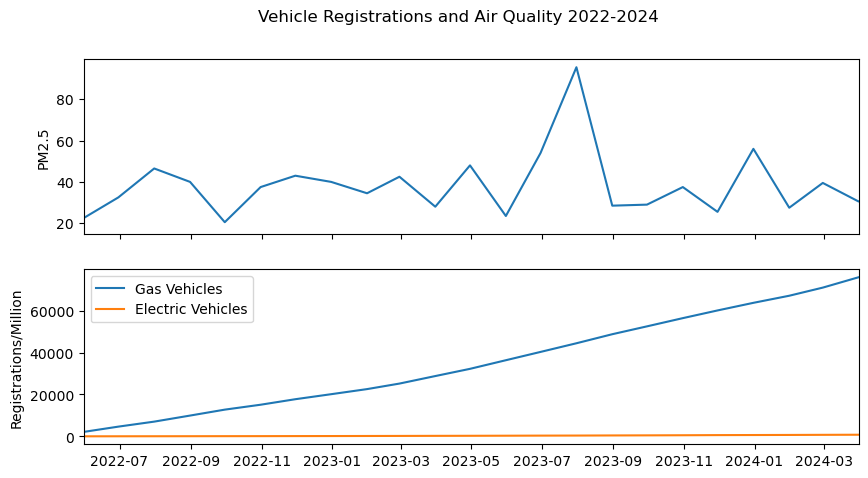

In [28]:
# plot electric vs gas vehicles over time along air quality overtime
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 5))
fig.suptitle('Vehicle Registrations and Air Quality 2022-2024')

ax1.set_xlim(min(albany_electric.index), max(albany_electric.index))

ax1.plot(albany_aq['AQI'], label='AQI')
ax1.set_ylabel('PM2.5')
ax2.plot(albany_gas['Fuel Type'].cumsum(), label='Gas Vehicles')
ax2.plot(albany_electric['Fuel Type'].cumsum(), label='Electric Vehicles')
ax2.legend()
ax2.set_ylabel('Registrations/Million')

plt.show()

In [30]:
Rochester = ['ROCHESTER', 'EAST ROCHESTER', 'E ROCHESTER',
    'ROCHESTER NY', 'ROCHESTERR']

rochester_cars = getCarData(Rochester)
rochester_gas = rochester_cars[rochester_cars['Fuel Type'] == 'GAS']
rochester_gas = rochester_gas.reset_index()
rochester_gas = rochester_gas.set_index('Reg Valid Date')
rochester_gas = rochester_gas.resample('M').count()
rochester_electric = rochester_cars[rochester_cars['Fuel Type'] == 'ELECTRIC']
rochester_electric = rochester_electric.reset_index()
rochester_electric = rochester_electric.set_index('Reg Valid Date')
rochester_electric = rochester_electric.resample('M').count()

rochester_aq = aq_df[aq_df['ReportingArea'] == 'Eastern Lake Ontario Region']
rochester_aq = rochester_aq.reset_index()
rochester_aq['DateObserved'] = pd.to_datetime(rochester_aq['DateObserved'])
rochester_aq = rochester_aq.set_index('DateObserved')
rochester_aq = rochester_aq.resample('M')[['AQI']].mean()


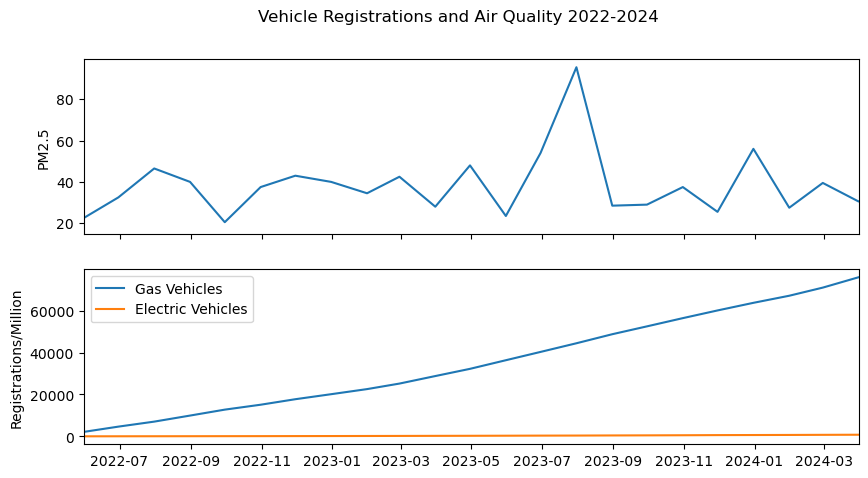

In [31]:
# plot electric vs gas vehicles over time along air quality overtime
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 5))
fig.suptitle('Vehicle Registrations and Air Quality 2022-2024')

ax1.set_xlim(min(albany_electric.index), max(albany_electric.index))

ax1.plot(albany_aq['AQI'], label='AQI')
ax1.set_ylabel('PM2.5')
ax2.plot(albany_gas['Fuel Type'].cumsum(), label='Gas Vehicles')
ax2.plot(albany_electric['Fuel Type'].cumsum(), label='Electric Vehicles')
ax2.legend()
ax2.set_ylabel('Registrations/Million')

plt.show()

In [32]:
display(rochester_aq["AQI"].mean())
display(albany_aq["AQI"].mean())

36.15094339622642

38.12264150943396

In [33]:
fips = pd.read_csv(os.path.join(cwd, data_dir, 'fips2county.tsv'), sep='\t')

# ny_fips = fips[fips['StateName'] == 'NY'].values[0]
nyc_fips = fips[(fips['CountyName'].isin(['New York', 'Bronx', 'Kings', 'Queens', 'Richmond'])) & (fips['StateName'].str.contains('New York'))]
# albany_fips = ny_fips[ny_fips['county'].isin(['Albany'])]
# rochester_fips = ny_fips[ny_fips['county'].isin(['Monroe'])]

for county in nyc_fips['CountyCBSA'].values:
    nyc_walkindex = pd.concat([walkability_df, walkability_df[
        (walkability_df['CBSA'] == county)
    ]])

nyc_walkindex = nyc_walkindex.drop_duplicates()

nyc_walkindex['NatWalkInd'].mean()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Chris\\Desktop\\Columbia\\Project_1\\CU-VIRT-AI-PT-03-2024-U-LOLC-PROJECT-1\\Resources\\fips2county.tsv'

In [ ]:
nyc_fips

In [ ]:
nyc_walkindex['NatWalkInd'].describe()

In [ ]:
albany_fips = fips[(fips['CountyName'].isin(['Albany'])) & (fips['StateName'].str.contains('New York'))]
albany_walkindex = pd.DataFrame()
for county in albany_fips['CountyCBSA'].values:
    albany_walkindex = pd.concat([walkability_df, walkability_df[
        (walkability_df['CBSA'] == county)
    ]])

albany_walkindex = albany_walkindex.drop_duplicates()

albany_walkindex['NatWalkInd'].mean()

In [ ]:
nyc_gas = pd.concat([bronx_cars, brooklyn_cars, queens_cars, manhattan_cars, staten_island_cars])
display(nyc_gas.head())

nyc_gas = nyc_gas[nyc_gas['Fuel Type'] == 'GAS']
nyc_gas = nyc_gas.reset_index(drop=False)

# nyc_gas['Reg Valid Date'] = nyc_gas['Reg Valid Date'].dt.to_period('M')

nyc_gas.head()

In [ ]:
albany_walkindex['NatWalkInd'].describe()

In [ ]:
rochester_fips = fips[(fips['CountyName'].isin(['Monroe'])) & (fips['StateName'].str.contains('New York'))]
for county in rochester_fips['CountyCBSA'].values:
    rochester_walkindex = pd.concat([walkability_df, walkability_df[
        walkability_df['CBSA'] == county
    ]])

rochester_walkindex['NatWalkInd'].mean()

In [ ]:
rochester_fips

In [23]:
rochester_walkindex['NatWalkInd'].describe()

NameError: name 'rochester_walkindex' is not defined